In [6]:
#dependencies
from pathlib import Path
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
#read in the csv and assign it to "df"
file_path = "myopia.csv"
df = pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [8]:
# Drop the "MYOPIC" column, as it is unneeded for unsupervised learning
df2 = df.drop("MYOPIC", axis=1)
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [9]:
#Scale the data so that the size of values does not influence the models
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [10]:
#Perform dimensionality reduction using PCA, preserving 90% of the explained variance 
pca = PCA(n_components= 0.90)
pca_data = pca.fit_transform(scaled_data)

In [12]:
#Reduce dataset dimensions further using t-SNE, using "auto" as the learning rate
tsne = TSNE(learning_rate='auto')
transformed_features = tsne.fit_transform(pca_data)

C:\Users\markm\anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [13]:
#Put the transformed_features into new columns in df2, and call back in the original target values
df2["x"] = transformed_features[:,0]
df2["y"] = transformed_features[:,1]
df2["class"] = df["MYOPIC"]

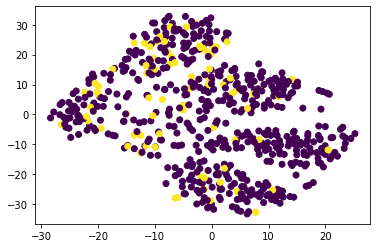

In [15]:
#Plot the transformed data, using the class as the color
plt.scatter(df2["x"], df2["y"], c= df2["class"])
plt.show()

In [17]:
#Create a for loop to determine the inertia for each value of k
from sklearn.cluster import KMeans
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters= i, random_state=42)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    
#Hold the elbow data in a dataframe 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\markm\anaconda\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,7948.905345
1,2,6794.293482
2,3,6030.953812
3,4,5662.799045
4,5,5381.970825
5,6,5127.751086
6,7,4926.212042
7,8,4741.864184
8,9,4585.604309
9,10,4458.846628


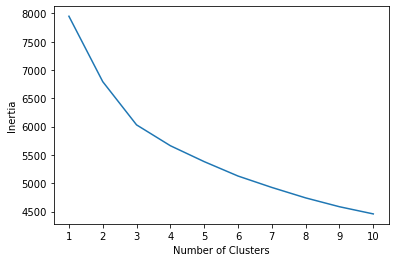

In [18]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based upon the kMeans plot, the elbow of the graph appears to be at 3. This means that the patients can be clustered into 3 seperate groups. This is where the inertia changes start to level out. 